Ex 6.5, 6.6, 6.9, 6.10, 6.24 <br>
Exam 2017: Problem 1, <br>
Exam 2016: Problem 2, <br>
Exam 2014:Problem 1

# 6.6 Conditional. $N|\mu$

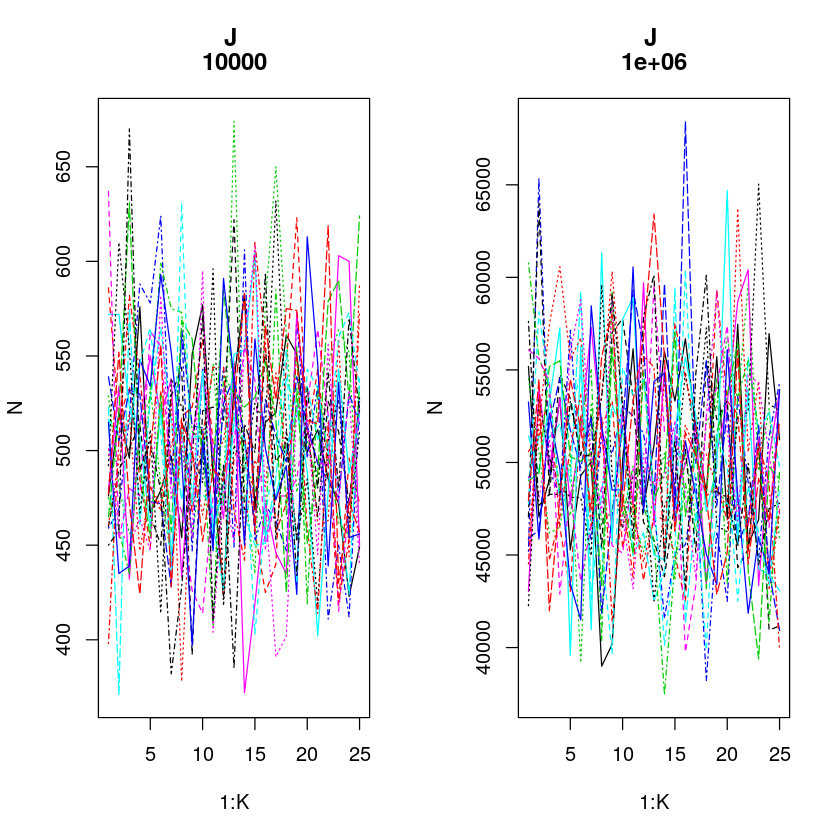

In [7]:
xsi = .05
sigma = .09975
m=20
K=25
T=1
Js = c(10**4, 10^6)

par(mfrow = c(1, length(Js)))
for (J in Js){
    mu = xsi*exp(-sigma**2/2+sigma*rnorm(m*K)) # From ex 6.5
    N = matrix(rpois(m*K, J*mu*T), K, m) # m*K values, J*mu*T input, K rows, m cols
    matplot(1:K, N, "l")    
    title(c('J ', J))
}


Increasing the policy number does not reduce risk. Makes sense, since common factor, and it is not possible to reduce risk from common factor by diversification.

# 6.10 Common factor sd portfolio losses

## a)Argue loss higher than when factor is not common
__Answer:__ <br>
The correction to the std portfolio loss is much greater than in the absence of a common factor. The correction goes from $\sqrt{1+ \delta}$ to $\sqrt{1+ J \delta}$. 

In [19]:
xiMu = .05
sigmaMu = .01
sigmaZToxiZ = .5
J = 100000


delta = T*(sigmaMu^2/xiMu)/(1+ sigmaZToxiZ^2)

factor = sqrt(1 + delta)
cat('Not common factor',factor)

factor = sqrt(1 + J*delta)
cat('\nCommon factor',factor)

Not common factor 1,0008
Common factor 12,68858

Common factor increases std dramatically

## b) What does the fact that $\sigma_z/\xi_z$ decareses $\sqrt{1+J \delta}$ tell us?
__Answer:__
<mark>More variation in the claim sizes relative to the clain means reduces the added risk from the common factor. Here the claim sizes becomes less "common", compensating for the commong claim intensities.

# 6.24 Random claim intensity. Effect of changed parameter.

In [43]:
xi = .05
taus = c(.5, 1)
T = 1
J = 100
m = 10000

for (tau in taus){
    eps = rnorm(m)
    mu = xi*exp(-tau**2/2. + tau*eps)

    N = matrix(0, J, m) # -> J x M matrix with zeros
    for (i in 1:m){
        N[,i] = rpois(J, mu[i]*T) # -> Each column one MC. Each MC get J N's
    }

    largeN = apply(N, 2, sum)
    meanN = mean(largeN)
    sdN = sd(largeN)

    cat('\ntau', tau, 'meanN', meanN,'sdN', sdN)   
}


tau 0,5 meanN 5,0082 sdN 3,485936
tau 1 meanN 4,8918 sdN 6,468623

Mean unchanged, std increases with $\tau$, because <mark>p. 190 $\mathrm{E}(N) = J T \xi_\mu$ and (6.18) right $sd(N) = T \sqrt{J(\sigma_\mu^2 + \xi_\mu / T)}$, where $\xi_\mu = E(\mu)$ and $\sigma_\mu = \mathrm{sd}(\mu)$.  The first is independent on $\mu$, while the other is not.<mark>
    
Old: $\xi_{\mu}$ is the expected value of $\mu$ and is unchanged, giveing stable mean, while the variance of $\mu$ is affected by $\tau$. $\mu$ again affects N.

In [40]:
# Oppg. 6.24

ximu <- 0.05
tau <- 0.5
T <- 1
J <- 100
m <- 1e4

eps <- rnorm(m)

mu <- ximu*exp(-0.5*tau^2+tau*eps)
N <- matrix(0,J,m)
for(i in 1:m)
{
  N[,i] <- rpois(J,mu[i]*T)
}
Ncal <- apply(N,2,sum)
mean(Ncal)
sd(Ncal)

tau <- 1
mu <- ximu*exp(-0.5*tau^2+tau*eps)
N <- matrix(0,J,m)
for(i in 1:m)
{
  N[,i] <- rpois(J,mu[i]*T)
}
Ncal <- apply(N,2,sum)
mean(Ncal)
sd(Ncal)

[1] 4,991

[1] 3,491581

[1] 5,0073

[1] 7,43969